In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def poisson_knuth(_lambda):
    L = np.exp(-_lambda)
    k = 0
    p = 1.0
    while True:
        k = k + 1
        u = np.random.rand()
        p = p * u
        if p <= L:
            break
    return k - 1

In [3]:
def poisson_pdf(arr, _lambda):
    p = np.full(len(arr), np.float128(np.exp(np.float128(-_lambda))))
    for k, x in enumerate(arr):
        for i in range(x):
            p[k] *= _lambda
            p[k] /= i + 1
    return p

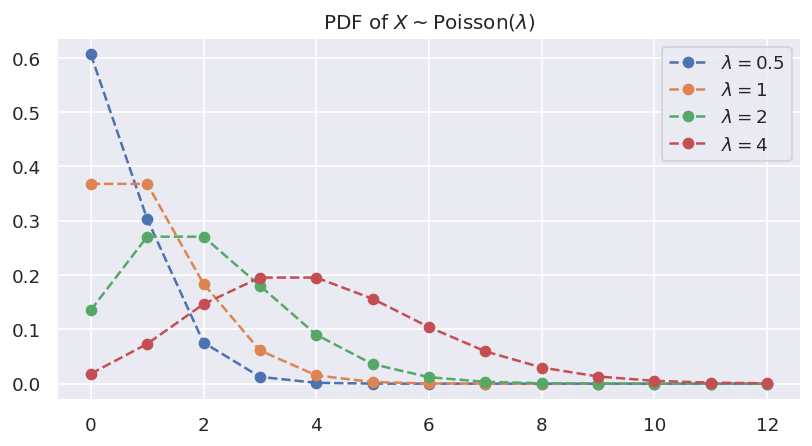

In [4]:
_lambdas = [0.5, 1, 2, 4]

fig = plt.figure(figsize=(8, 4), dpi=120)
x = np.arange(0, 13, 1)
for _lambda in _lambdas:
    p = poisson_pdf(x, _lambda)
    plt.plot(x, p, label=f'$\lambda = {_lambda}$', linestyle='dashed', marker='o')
plt.title('PDF of $X \sim$Poisson$(\lambda)$')
plt.legend()
plt.show()

In [5]:
_lambda1 = 0.5
N1 = 5000

X1 = np.array([poisson_knuth(_lambda1) for _ in range(N1)])

In [6]:
_lambda2 = 4.0
N2 = 5000

X2 = np.array([poisson_knuth(_lambda2) for _ in range(N2)])

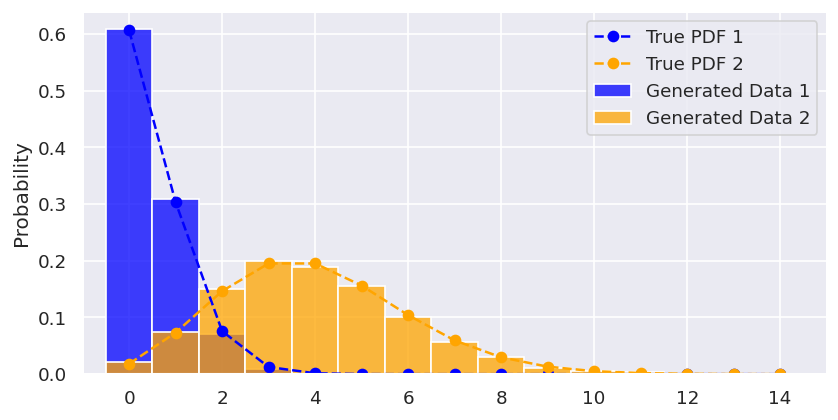

In [7]:
fig = plt.figure(figsize=(8, 4), dpi=120)

sns.histplot(X1, stat='probability',
            label='Generated Data 1', 
            color='blue',
            discrete=True)

x = np.arange(0, 15, 1)
p = poisson_pdf(x, _lambda1)
plt.plot(x, p, label='True PDF 1', linestyle='dashed', marker='o', color='blue')

sns.histplot(X2, stat='probability',
            label='Generated Data 2', 
            color='orange',
            discrete=True)

x = np.arange(0, 15, 1)
p = poisson_pdf(x, _lambda2)
plt.plot(x, p, label='True PDF 2', linestyle='dashed', marker='o', color='orange')

plt.legend()

plt.xlim(-1, 15)
plt.show()

In [8]:
def poisson_junhao(_lambda, STEP=100.0):
    _lambda_left = _lambda
    k = 0
    p = 1.0
    while True:
        k = k + 1
        u = np.random.rand()
        p = p * u
        while p < 1.0 and _lambda_left > 0.0:
            if _lambda_left > STEP:
                p = p * np.exp(STEP)
                _lambda_left -= STEP
            else:
                p = p * np.exp(_lambda_left)
                _lambda_left = 0.0
        if p <= 1.0:
            break
    return k - 1

In [9]:
_lambda3 = 800.0
N3 = 500000

X3 = np.array([poisson_knuth(_lambda3) for _ in range(N3)])
X3_ = np.array([poisson_junhao(_lambda3) for _ in range(N3)])

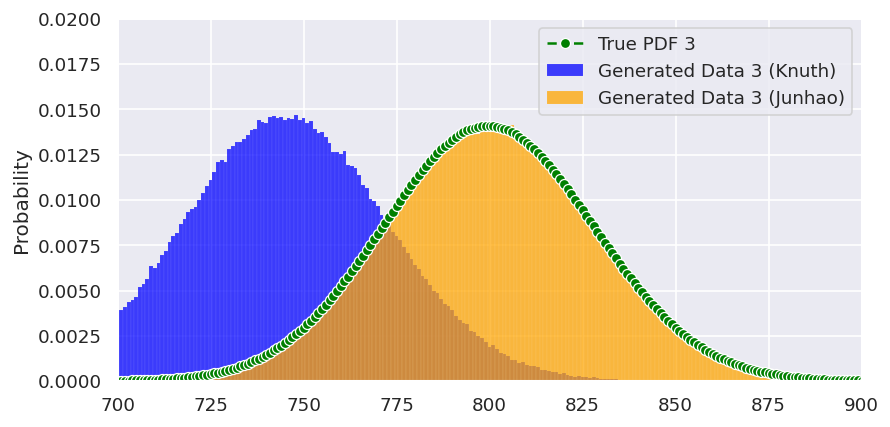

In [10]:
fig = plt.figure(figsize=(8, 4), dpi=120)

x = np.arange(0, 1000, 1)
p = poisson_pdf(x, _lambda3)
sns.lineplot(x=x, y=p,
             label='True PDF 3', 
             linestyle='dashed', 
             marker='o', 
             color='green')

sns.histplot(x=X3, stat='probability',
            label='Generated Data 3 (Knuth)', 
            color='blue',
            discrete=True)

sns.histplot(x=X3_, stat='probability',
            label='Generated Data 3 (Junhao)', 
            color='orange',
            discrete=True)

plt.legend()
plt.xlim(700, 900)
plt.ylim(0, 0.02)
plt.show()